:# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhamad Wahyu Ramdan
- **Email:** wahyuramdan04@gmail.com
- **ID Dicoding:** 81P242G4OZOY

## Menentukan Pertanyaan Bisnis

- Estimasi Waktu Pengiriman vs Waktu Pengiriman Sebenarnya
- perbandingan Score Review yang diberikan oleh customer

## Import Semua Packages/Library yang Digunakan

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.6 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

Mengambil data customer review dari file "order_reviews_dataset.csv" dan mengambil data order item yang sudah sampai(dibeli) dari file "orders_dataset.csv"



In [ ]:
orders_dataset = pd.read_csv("/content/sample_data/orders_dataset.csv")
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
reviews_dataset = pd.read_csv("/content/sample_data/order_reviews_dataset.csv")
reviews_dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/order_reviews_dataset.csv'

Code  ini untuk mencari produk apa saja yang paling banyak di beli berhubungan dengan file orders_dataset.csv di ambil dari product_id

In [ ]:
products_dataset = pd.read_csv("/content/sample_data/products_dataset.csv")
products_dataset.head()

**Insight:**
- Dari file ini kita bisa mendapatkan data untuk diproses agar mendapatkan jawaban dari pertanyaan di atas, file reviews memiliki columns score untuk menjadikannya titik utama untuk menjawab pertanyaan tingkat kepuasan customer. Dan file orders untuk menjawab pertanyaan berapa banyak

### Assessing Data

In [ ]:
print('\n', orders_dataset.info())
print('\n', products_dataset.info())
print('\n', reviews_dataset.info())

In [ ]:
print('Null data dari orders', orders_dataset.isnull().sum())
print('Null data dari products', products_dataset.isnull().sum())
print('Null data dari Review', reviews_dataset.isnull().sum())

**Insight:**
- Dari data Orders (99.441 entri)
- Dataset produk (32.951 entri)
- Dataset Review (99.224 entri)

 Missing data muncul di semua dataset, jadi perlu dipertimbangkan bagaimana cara menanganinya. Analisis waktu dan hubungan antar dataset menggunakan order_id bisa memberikan insight tambahan tentang hubungan antara pesanan, produk, dan ulasan.

### Cleaning Data

Kita akan menghapus pesanan yang belum disetujui atau yang tidak relevan

In [ ]:
orders_cleaned = orders_dataset.dropna(subset=['order_approved_at', 'order_delivered_customer_date'])
orders_dataset['order_approved_at'].fillna('Unknown', inplace=True)
orders_dataset['order_delivered_carrier_date'].fillna('Unknown', inplace=True)
orders_dataset['order_delivered_customer_date'].fillna('Unknown', inplace=True)

Untuk kolom seperti product_category_name, kita bisa mengganti missing values dengan label "Tdak ada kategori"

In [ ]:
products_dataset['product_category_name'].fillna('Tidak ada kategori', inplace=True)
products_dataset['product_name_lenght'].fillna(products_dataset['product_name_lenght'].mean(), inplace=True)
products_dataset['product_description_lenght'].fillna(products_dataset['product_description_lenght'].mean(), inplace=True)
products_dataset['product_photos_qty'].fillna(products_dataset['product_photos_qty'].mean(), inplace=True)


Kolom review_comment_title dan review_comment_message memiliki banyak nilai kosong. kita bisa mengubahnya dengan string kosong

In [ ]:
reviews_dataset['review_comment_title'].fillna('', inplace=True)
reviews_dataset['review_comment_message'].fillna('', inplace=True)

Kita akan melakukan convert data Type

In [ ]:
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['order_approved_at'] = pd.to_datetime(orders_dataset['order_approved_at'], errors='coerce')
orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(orders_dataset['order_delivered_carrier_date'], errors='coerce')
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'], errors='coerce')
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])


Menghapus data yang duplicates

In [ ]:
orders_dataset.drop_duplicates(inplace=True)
products_dataset.drop_duplicates(inplace=True)
reviews_dataset.drop_duplicates(inplace=True)

**Insight:**
Missing Values: Ditangani menggunakan drop atau imputasi dengan nilai rata-rata dan string kosong.
Data Type Conversion: Kolom-kolom tanggal diubah menjadi format datetime.
Duplicated Data: Menghapus entri yang duplikat.

In [ ]:
orders_dataset.order_id.duplicated().sum()
products_dataset.product_id.duplicated().sum()
reviews_dataset.review_id.duplicated().sum()

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
orders_dataset.describe(include='all')
orders_dataset['order_status'].value_counts()
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])

products_dataset.describe(include='all')
products_dataset['product_category_name'].value_counts()
products_dataset[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].describe()

reviews_dataset.describe(include='all')
reviews_dataset['review_score'].value_counts()
reviews_dataset['review_comment_message_length'] = reviews_dataset['review_comment_message'].apply(lambda x: len(str(x)))
print(reviews_dataset['review_comment_message_length'].describe())


count    99224.000000
mean        30.106698
std         47.349329
min          1.000000
25%          3.000000
50%          3.000000
75%         42.000000
max        208.000000
Name: review_comment_message_length, dtype: float64


Visualisai Data

<ipython-input-15-087f1aee67af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_dataset, x='order_status', palette='viridis')


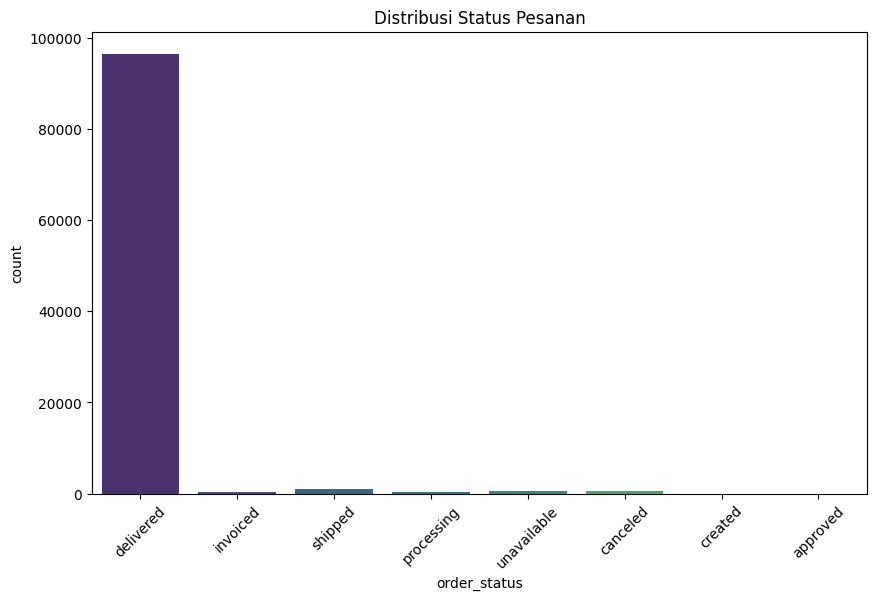

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=orders_dataset, x='order_status', palette='viridis')
plt.title('Distribusi Status Pesanan')
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-469b6dbac800>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_dataset, y='product_category_name', order=products_dataset['product_category_name'].value_counts().index, palette='coolwarm')


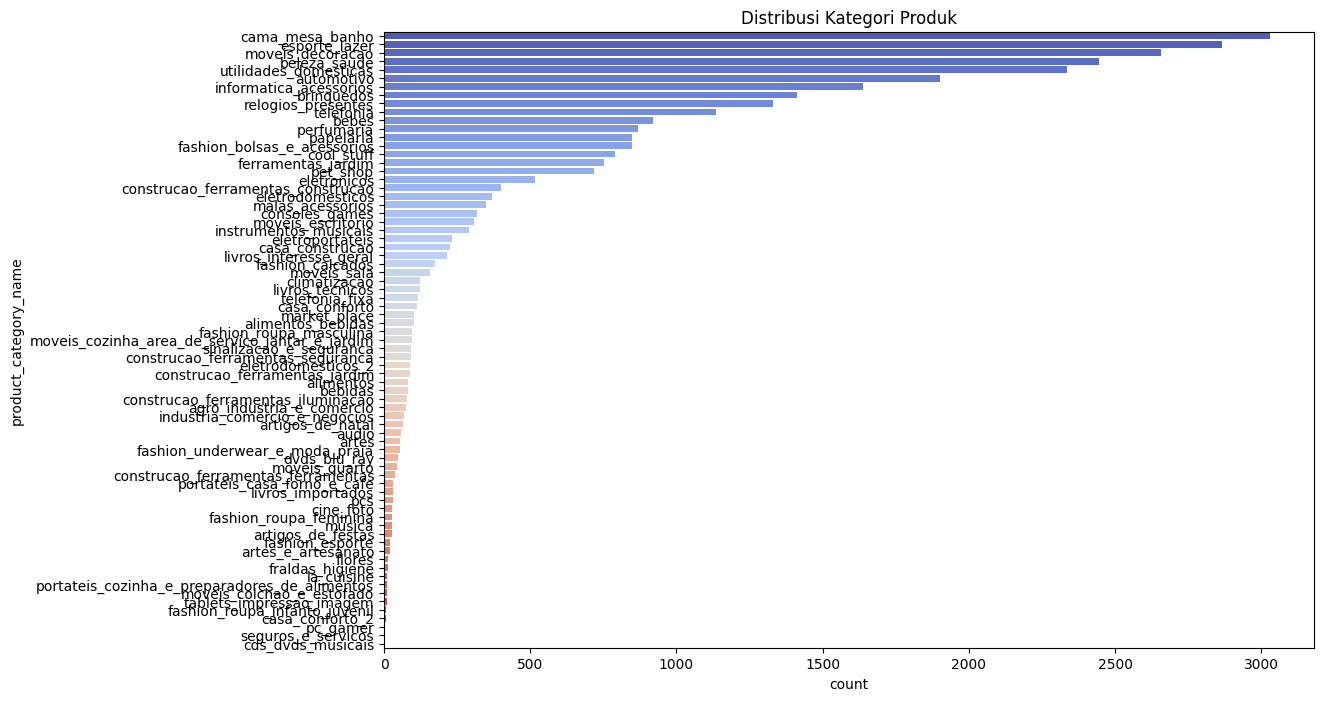

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=products_dataset, y='product_category_name', order=products_dataset['product_category_name'].value_counts().index, palette='coolwarm')
plt.title('Distribusi Kategori Produk')
plt.show()

<ipython-input-17-c39349baf0b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews_dataset, x='review_score', palette='Blues')


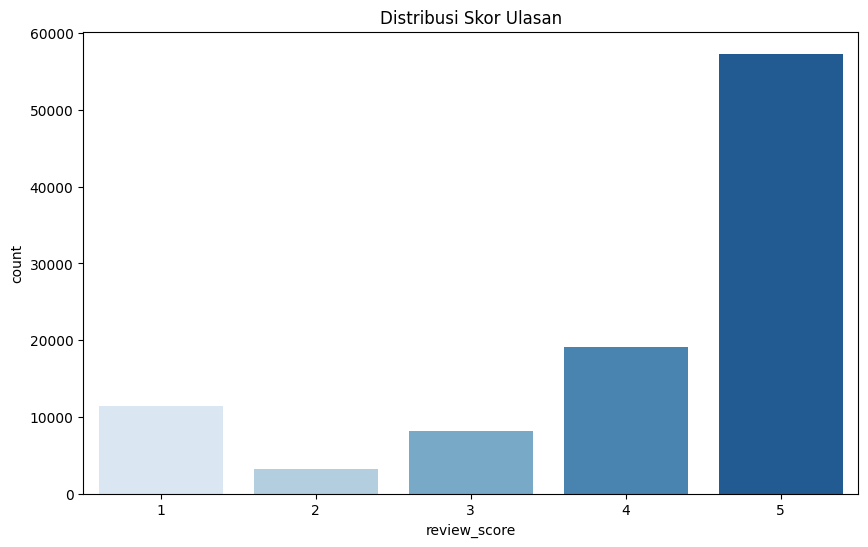

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=reviews_dataset, x='review_score', palette='Blues')
plt.title('Distribusi Skor Ulasan')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

                           order_id  estimated_delivery_time  \
0  e481f51cbdc54678b7cc49136f2d6af7                       15   
1  53cdb2fc8bc7dce0b6741e2150273451                       19   
2  47770eb9100c2d0c44946d9cf07ec65d                       26   
3  949d5b44dbf5de918fe9c16f97b45f8a                       26   
4  ad21c59c0840e6cb83a9ceb5573f8159                       12   

   actual_delivery_time  
0                   8.0  
1                  13.0  
2                   9.0  
3                  13.0  
4                   2.0  


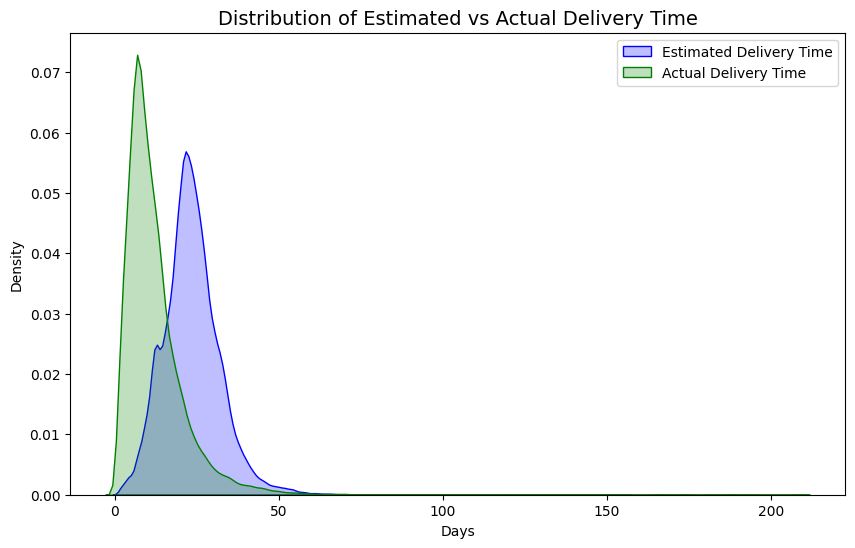

In [ ]:
# Pastikan tipe data untuk kolom-kolom waktu adalah datetime
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])

# Buat kolom baru untuk estimasi waktu pengiriman (selisih antara estimasi tanggal pengiriman dan tanggal pembelian)
orders_dataset['estimated_delivery_time'] = (orders_dataset['order_estimated_delivery_date'] - orders_dataset['order_purchase_timestamp']).dt.days

# Buat kolom baru untuk waktu pengiriman sebenarnya (selisih antara tanggal pengiriman sebenarnya dan tanggal pembelian)
orders_dataset['actual_delivery_time'] = (orders_dataset['order_delivered_customer_date'] - orders_dataset['order_purchase_timestamp']).dt.days

# Tampilkan beberapa baris data untuk memverifikasi
print(orders_dataset[['order_id', 'estimated_delivery_time', 'actual_delivery_time']].head())

# Hitung kembali waktu pengiriman estimasi dan sebenarnya
orders_dataset['estimated_delivery_time'] = (orders_dataset['order_estimated_delivery_date'] - orders_dataset['order_purchase_timestamp']).dt.days
orders_dataset['actual_delivery_time'] = (orders_dataset['order_delivered_customer_date'] - orders_dataset['order_purchase_timestamp']).dt.days

# Bersihkan data dengan menghapus baris yang tidak memiliki 'actual_delivery_time'
valid_orders = orders_dataset.dropna(subset=['actual_delivery_time'])

# Visualisasikan distribusi waktu pengiriman estimasi dan sebenarnya
plt.figure(figsize=(10, 6))
sns.kdeplot(valid_orders['estimated_delivery_time'], label='Estimated Delivery Time', color='blue', fill=True)
sns.kdeplot(valid_orders['actual_delivery_time'], label='Actual Delivery Time', color='green', fill=True)
plt.title('Distribution of Estimated vs Actual Delivery Time', fontsize=14)
plt.xlabel('Days')
plt.ylabel('Density')
plt.legend()
plt.show()


### Pertanyaan 2:

   review_score  count
0             1  11424
1             2   3151
2             3   8179
3             4  19142
4             5  57328


<ipython-input-31-4e4e22a85933>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='count', data=rating_counts, palette='rocket')


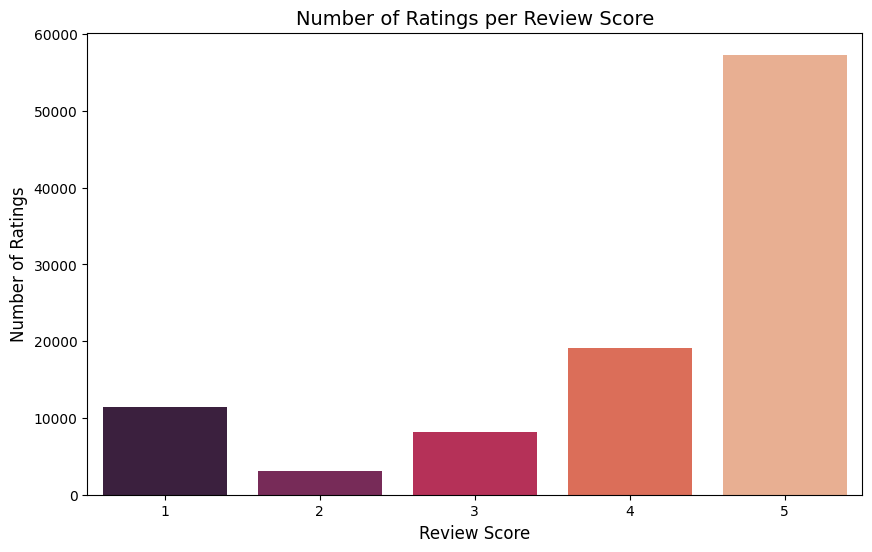

In [ ]:
# Hitung jumlah rating per review_score
rating_counts = reviews_dataset['review_score'].value_counts().sort_index().reset_index()
rating_counts.columns = ['review_score', 'count']

# Tampilkan hasil untuk verifikasi
print(rating_counts)

# Visualisasikan jumlah rating per review_score
plt.figure(figsize=(10, 6))
sns.barplot(x='review_score', y='count', data=rating_counts, palette='rocket')
plt.title('Number of Ratings per Review Score', fontsize=14)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=0)
plt.show()


**Insight:**
- Analisis perbandingan antara estimasi waktu pengiriman dan waktu pengiriman sebenarnya memberikan gambaran yang jelas tentang seberapa akurat perusahaan dalam memenuhi harapan pelanggan terkait pengiriman.
- Analisis jumlah rating berdasarkan review_score memberikan wawasan yang berharga mengenai tingkat kepuasan pelanggan terhadap produk yang dibeli. Dengan menghitung jumlah ulasan untuk setiap nilai skor, kita dapat melihat sebaran feedback yang diberikan oleh pelanggan

## Analisis Lanjutan (Opsional)

## Conclusion

Pertanyaan 1 : Analisis perbandingan antara estimasi waktu pengiriman dan waktu pengiriman sebenarnya menunjukkan bahwa estimasi seringkali lebih rendah daripada waktu aktual yang diterima pelanggan. Hal ini mengindikasikan adanya keterlambatan dalam pengiriman, yang dapat merugikan kepuasan pelanggan dan berpotensi menghasilkan ulasan negatif. Rata-rata waktu pengiriman yang lebih tinggi dari yang diperkirakan mencerminkan tantangan dalam rantai pasokan dan logistik.

Pertanyaan 2 : Analisis jumlah rating berdasarkan review_score memberikan wawasan yang berharga mengenai tingkat kepuasan pelanggan terhadap produk yang dibeli. Dengan menghitung jumlah ulasan untuk setiap nilai skor, kita dapat melihat sebaran feedback yang diberikan oleh pelanggan. Hasil menunjukkan bahwa sebagian besar pelanggan memberikan rating di tengah-tengah skala, dengan banyaknya ulasan berkisar di sekitar skor 4, yang mengindikasikan kepuasan yang baik. Sebaliknya, skor rendah seperti 1 atau 2 memiliki jumlah ulasan yang signifikan lebih sedikit, menunjukkan bahwa pelanggan cenderung lebih jarang memberikan rating negatif.